<a href="https://colab.research.google.com/github/urlapovia03/university/blob/main/%D0%94%D0%9F%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%9610_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%80%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B2%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B2_Rasterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №3. Работа с растровыми данными в Rasterio**

---

**Данные для обработки:**

- Одноканальное изображение (ЦМР): https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
- Мультиспектральное изображение (Landsat): https://github.com/opengeos/datasets/releases/download/raster/cog.tif

### **Задание 1. Чтение и исследование растровых данных**



1. Откройте одноканальное изображение ЦМР с использованием `rasterio`.


In [3]:
import rasterio
import urllib.request

url = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"
output_path = "dem_90m.tif"

urllib.request.urlretrieve(url, output_path)

print("Файл успешно загружен:", output_path)


Файл успешно загружен: dem_90m.tif
Размеры (строки, столбцы): 3113 4269
Количество каналов: 1
Тип данных: int16
CRS: EPSG:3857
Разрешение: (90.0, 89.99579177642138)


2. Извлеките и выведите метаданные растра, включая СК, разрешение, границы, количество каналов и типы данных.


In [6]:
with rasterio.open("dem_90m.tif") as dataset:
    dem = dataset.read(1)

    print("Размеры (строки, столбцы):", dataset.height, dataset.width)
    print("Количество каналов:", dataset.count)
    print("Тип данных:", dem.dtype)
    print("CRS:", dataset.crs)
    print("Разрешение:", dataset.res)

Размеры (строки, столбцы): 3113 4269
Количество каналов: 1
Тип данных: int16
CRS: EPSG:3857
Разрешение: (90.0, 89.99579177642138)


3. Отобразите ширину и высоту растра, а также типы данных пикселей, чтобы понять размеры сетки и структуру данных.

In [7]:
with rasterio.open("dem_90m.tif") as dataset:
    width = dataset.width
    height = dataset.height
    dtype = dataset.dtypes[0]

    print("Ширина растра (пиксели):", width)
    print("Высота растра (пиксели):", height)
    print("Тип данных пикселей:", dtype)


Ширина растра (пиксели): 4269
Высота растра (пиксели): 3113
Тип данных пикселей: int16


---



### **Задание 2. Визуализация и манипулирование растровыми каналами**



1. Визуализируйте одноканальное изображение ЦМР с использованием пользовательской цветовой карты (например, cmap='terrain').


In [5]:
with rasterio.open("dem_90m.tif") as dataset:
    width = dataset.width
    height = dataset.height
    dtype = dataset.dtypes[0]

    print("Ширина растра (пиксели):", width)
    print("Высота растра (пиксели):", height)
    print("Тип данных пикселей:", dtype)

Ширина растра (пиксели): 4269
Высота растра (пиксели): 3113
Тип данных пикселей: int16


2. Откройте мультиспектральное изображение и визуализируйте первый канал с использованием подходящей цветовой карты.


Мультиспектральный файл загружен: cog.tif
Количество каналов: 4
Размеры: 206 343


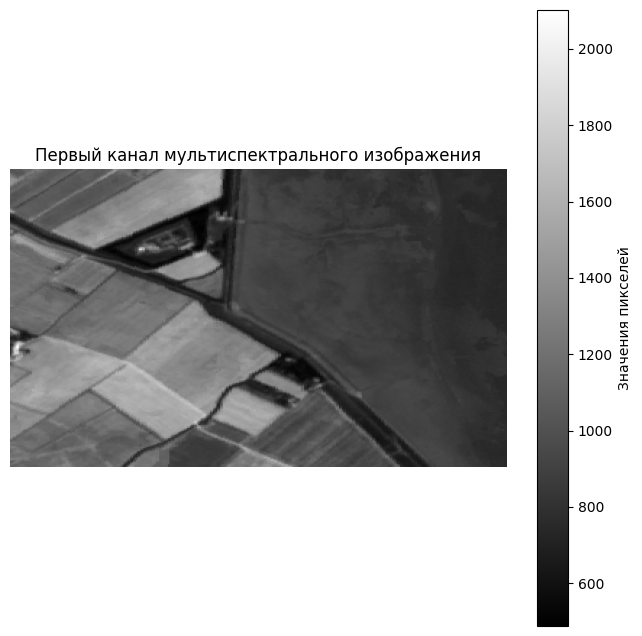

In [9]:
import matplotlib.pyplot as plt
url = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
output_path = "cog.tif"

urllib.request.urlretrieve(url, output_path)

print("Мультиспектральный файл загружен:", output_path)
with rasterio.open("cog.tif") as dataset:
    print("Количество каналов:", dataset.count)
    print("Размеры:", dataset.height, dataset.width)
with rasterio.open("cog.tif") as dataset:
    band1 = dataset.read(1)

plt.figure(figsize=(8, 8))
plt.imshow(band1, cmap="gray")
plt.title("Первый канал мультиспектрального изображения")
plt.colorbar(label="Значения пикселей")
plt.axis("off")
plt.show()

3. Объедините несколько каналов из мультиспектрального изображения (например, Красный, Зеленый и Синий) и совместите их в один массив для создания RGB-композитного изображения.

Форма RGB-массива: (206, 343, 3)


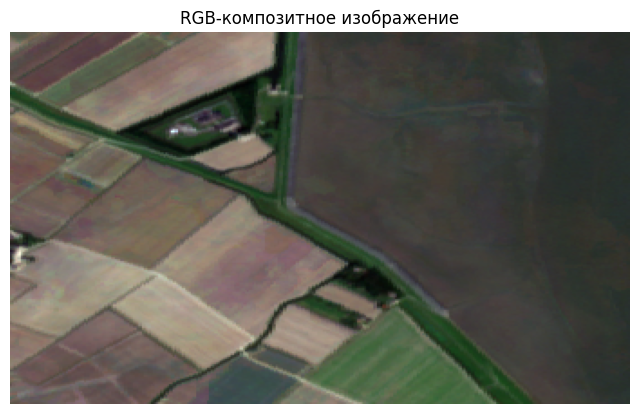

In [12]:
import numpy as np
with rasterio.open("cog.tif") as dataset:
    red = dataset.read(1)
    green = dataset.read(2)
    blue = dataset.read(3)


def normalize(channel):
    return (channel - channel.min()) / (channel.max() - channel.min())

rgb_norm = np.dstack((
    normalize(red),
    normalize(green),
    normalize(blue)
))

print("Форма RGB-массива:", rgb.shape)
plt.figure(figsize=(8, 8))
plt.imshow(rgb_norm)
plt.title("RGB-композитное изображение")
plt.axis("off")
plt.show()

---



### **Задание 3. Обрезка растра с использованием индексации массива**



1. Откройте мультиспектральное изображение и обрежьте его с использованием спискового среза (указав диапазоны строк и столбцов).


Форма обрезанного массива: (3, 100, 200)


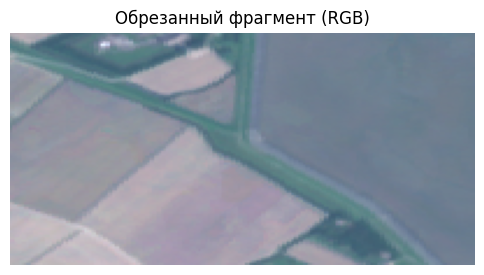

In [20]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("cog.tif") as dataset:
    data = dataset.read([1, 2, 3])

row_start, row_end = 50, 150   # внутри 0–206
col_start, col_end = 50, 250   # внутри 0–343

cropped = data[:, row_start:row_end, col_start:col_end]

print("Форма обрезанного массива:", cropped.shape)

rgb_crop = np.moveaxis(cropped, 0, -1)

rgb_crop = rgb_crop / rgb_crop.max()

plt.figure(figsize=(6, 6))
plt.imshow(rgb_crop)
plt.title("Обрезанный фрагмент (RGB)")
plt.axis("off")
plt.show()


2. Визуализируйте обрезанную часть изображения с использованием matplotlib, чтобы убедиться в корректном результате.


>*Примечание:*
>
> При работе с многоканальными растровыми изображениями, особенно в формате COG.TIFF (Cloud Optimized GeoTIFF), может возникнуть проблема с некорректным отображением псевдоцветного изображения. Это связано с тем, что разные каналы могут иметь различные диапазоны значений пикселей.
>
> Для корректной визуализации на шаге 2 необходимо применить нормализацию к каждому каналу перед отображением.



Включите следующую функцию в ваш код:

```python
# Функция для нормализации канала в диапазон от 0 до 1
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm
```

Размер растра: 206 x 343
Форма обрезанного массива: (3, 100, 200)


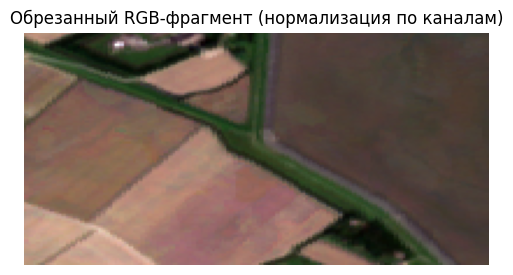

In [21]:

def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm

with rasterio.open("cog.tif") as dataset:
    data = dataset.read([1, 2, 3])
    height, width = dataset.height, dataset.width

print(f"Размер растра: {height} x {width}")


row_start, row_end = 50, 150
col_start, col_end = 50, 250

cropped = data[:, row_start:row_end, col_start:col_end]

print("Форма обрезанного массива:", cropped.shape)


rgb_crop = np.moveaxis(cropped, 0, -1)


rgb_norm = np.dstack((
    normalize(rgb_crop[:, :, 0]),
    normalize(rgb_crop[:, :, 1]),
    normalize(rgb_crop[:, :, 2])
))


plt.figure(figsize=(6, 6))
plt.imshow(rgb_norm)
plt.title("Обрезанный RGB-фрагмент (нормализация по каналам)")
plt.axis("off")
plt.show()


3. Сохраните обрезанное подмножество растра в новый файл с именем `clipped_multispectral.tif`.

In [25]:
from google.colab import files

with rasterio.open("cog.tif") as dataset:
    data = dataset.read([1, 2, 3])  # RGB
    profile = dataset.profile
    transform = dataset.transform

row_start, row_end = 50, 150
col_start, col_end = 50, 250


cropped = data[:, row_start:row_end, col_start:col_end]


new_transform = transform * rasterio.Affine.translation(col_start, row_start)


profile.update({
    "height": cropped.shape[1],
    "width": cropped.shape[2],
    "transform": new_transform,
    "count": 3
})


output_path = "clipped_multispectral.tif"

with rasterio.open(output_path, "w", **profile) as dst:
    dst.write(cropped)

print("Файл успешно сохранён:", output_path)
files.download("clipped_multispectral.tif")



Файл успешно сохранён: clipped_multispectral.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---



### **Задание 4. Вычисление NDWI (калькуляция каналов)**



1. Откройте мультиспектральное изображение и извлеките каналы Green (Зеленый) и Ближний инфракрасный (NIR).


In [24]:
with rasterio.open("cog.tif") as dataset:
    green = dataset.read(2)
    nir = dataset.read(4)

    print("Форма Green:", green.shape)
    print("Форма NIR:", nir.shape)

Форма Green: (206, 343)
Форма NIR: (206, 343)


2. Вычислите Нормализованный разностный водный индекс ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) по формуле:

    NDWI = (Green - NIR) / (Green + NIR)

In [28]:
ndwi = (green - nir) / (green + nir)

print("NDWI вычислен")
print("Минимум NDWI:", np.nanmin(ndwi))
print("Максимум NDWI:", np.nanmax(ndwi))

NDWI вычислен
Минимум NDWI: -0.6217617
Максимум NDWI: 0.47722894


3. Визуализируйте результат NDWI с использованием цветовой карты, подходящей для воды (например, cmap='Blues'), чтобы выделить водные объекты.


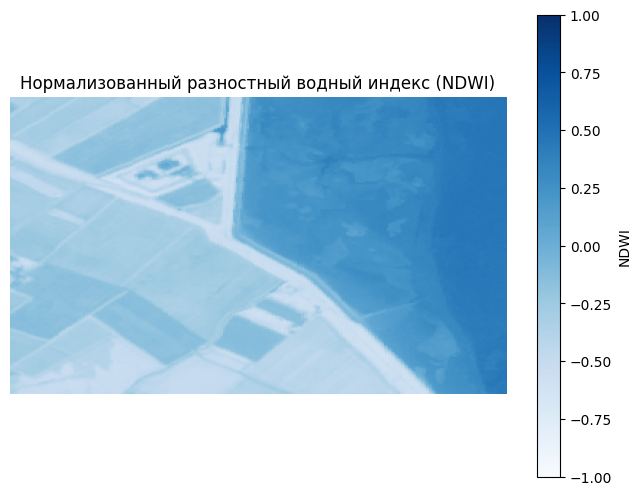

In [29]:
plt.figure(figsize=(8, 6))
plt.imshow(ndwi, cmap="Blues", vmin=-1, vmax=1)
plt.colorbar(label="NDWI")
plt.title("Нормализованный разностный водный индекс (NDWI)")
plt.axis("off")
plt.show()



4. Сохраните полученное изображение NDWI как новый растровый файл с именем ndwi.tif.

In [31]:
with rasterio.open("cog.tif") as dataset:
    profile = dataset.profile
    transform = dataset.transform
    crs = dataset.crs


    green = dataset.read(2).astype("float32")
    nir = dataset.read(4).astype("float32")

np.seterr(divide='ignore', invalid='ignore')
ndwi = (green - nir) / (green + nir)


profile.update({
    "dtype": "float32",
    "count": 1,        # один канал
    "nodata": np.nan
})


output_path = "ndwi.tif"

with rasterio.open(output_path, "w", **profile) as dst:
    dst.write(ndwi, 1)

print("Файл NDWI успешно сохранён:", output_path)
files.download("ndwi.tif")

Файл NDWI успешно сохранён: ndwi.tif


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---



### **Задание 5. Перепроецирование растровых данных**



1. Перепроецируйте одноканальный растр ЦМР из его исходной СК в EPSG:4326 (WGS 84) с использованием функции `rasterio.warp.reproject`.


In [34]:
from rasterio.warp import reproject, calculate_default_transform
from rasterio.enums import Resampling
src_path = "dem_90m.tif"
dst_path = "reprojected_dem.tif"

with rasterio.open(src_path) as src:
    src_crs = src.crs
    src_transform = src.transform
    src_data = src.read(1)
dst_crs = "EPSG:4326"

dst_transform, dst_width, dst_height = calculate_default_transform(
    src_crs,
    dst_crs,
    src.width,
    src.height,
    *src.bounds
)
dst_data = np.empty((dst_height, dst_width), dtype=src_data.dtype)
reproject(
    source=src_data,
    destination=dst_data,
    src_transform=src_transform,
    src_crs=src_crs,
    dst_transform=dst_transform,
    dst_crs=dst_crs,
    resampling=Resampling.bilinear
)
with rasterio.open("dem_90m_wgs84.tif") as ds:
    print("CRS:", ds.crs)

CRS: EPSG:4326


2. Сохраните перепроецированный растр в новый файл GeoTIFF с именем `reprojected_dem.tif`.


In [36]:
src_path = "dem_90m.tif"
dst_path = "reprojected_dem.tif"

with rasterio.open(src_path) as src:
    src_crs = src.crs
    src_transform = src.transform
    src_data = src.read(1)
dst_crs = "EPSG:4326"

dst_transform, dst_width, dst_height = calculate_default_transform(
    src_crs,
    dst_crs,
    src.width,
    src.height,
    *src.bounds
)
dst_data = np.empty((dst_height, dst_width), dtype=src_data.dtype)
reproject(
    source=src_data,
    destination=dst_data,
    src_transform=src_transform,
    src_crs=src_crs,
    dst_transform=dst_transform,
    dst_crs=dst_crs,
    resampling=Resampling.bilinear
)
with rasterio.open(
    dst_path,
    "w",
    driver="GTiff",
    height=dst_height,
    width=dst_width,
    count=1,
    dtype=dst_data.dtype,
    crs=dst_crs,
    transform=dst_transform
) as dst:
    dst.write(dst_data, 1)
files.download("reprojected_dem.tif")
print("Растр успешно перепроецирован в EPSG:4326")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Растр успешно перепроецирован в EPSG:4326


3. Визуализируйте как исходный, так и перепроецированный наборы данных ЦМР, чтобы сравнить, как перепроецирование влияет на пространственное покрытие и разрешение.

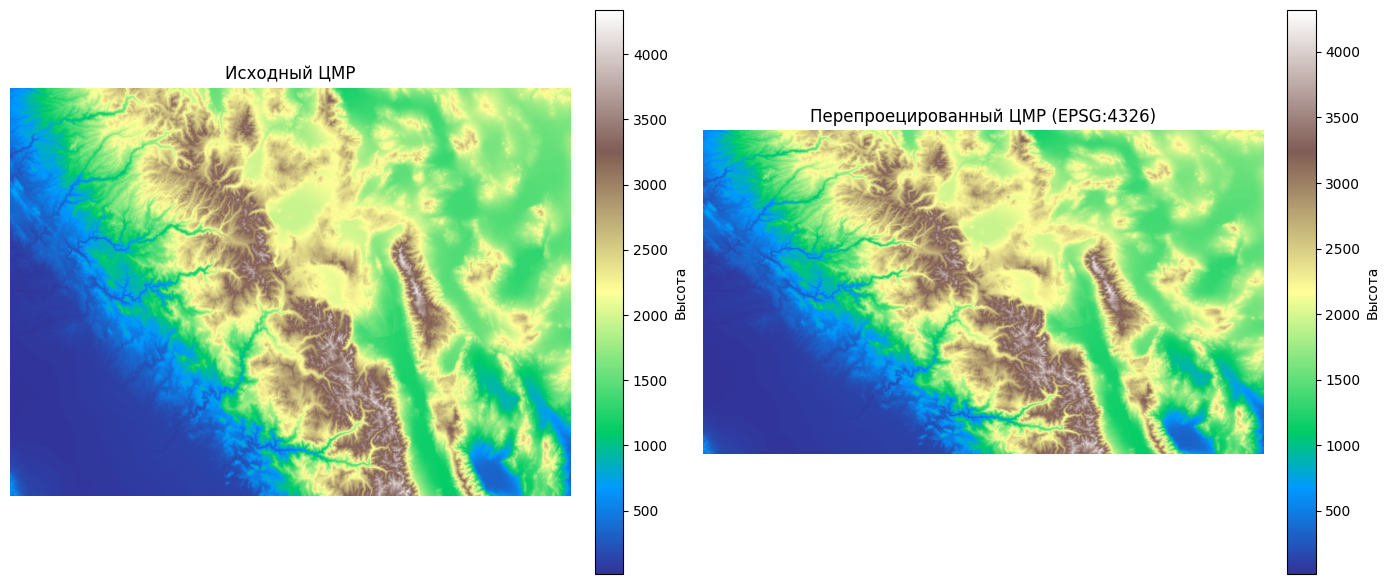

In [37]:

with rasterio.open("dem_90m.tif") as src:
    dem_original = src.read(1)
    transform_orig = src.transform

with rasterio.open("reprojected_dem.tif") as dst:
    dem_reprojected = dst.read(1)
    transform_reproj = dst.transform

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


im1 = axes[0].imshow(dem_original, cmap="terrain")
axes[0].set_title("Исходный ЦМР")
axes[0].axis("off")
plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04, label="Высота")


im2 = axes[1].imshow(dem_reprojected, cmap="terrain")
axes[1].set_title("Перепроецированный ЦМР (EPSG:4326)")
axes[1].axis("off")
plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04, label="Высота")

plt.tight_layout()
plt.show()

---